In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Vikas\jupyter book\ex_files\new_insurance_data.csv")

In [3]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


# first check there data type 

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

# check null values

In [5]:

df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [6]:
col=df.columns

In [7]:
for col_name in col:
    if df[col_name].dtypes=="object":
        df[col_name]=df[col_name].fillna(df[col_name].mode()[0])
    else:
        df[col_name]=df[col_name].fillna(df[col_name].mean())

In [8]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

#  check there duplicates

In [9]:
df.duplicated().sum()

0

# outlier

In [10]:
c=df.columns
c

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

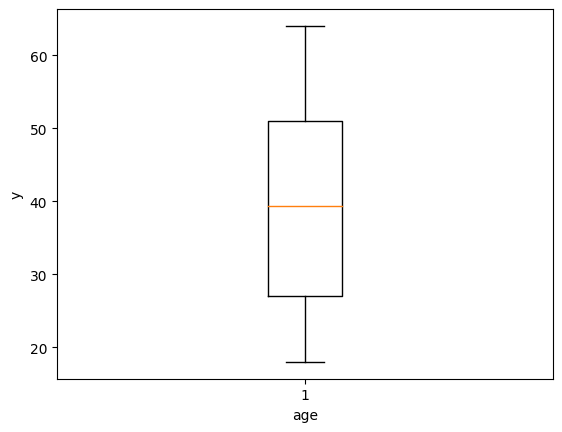

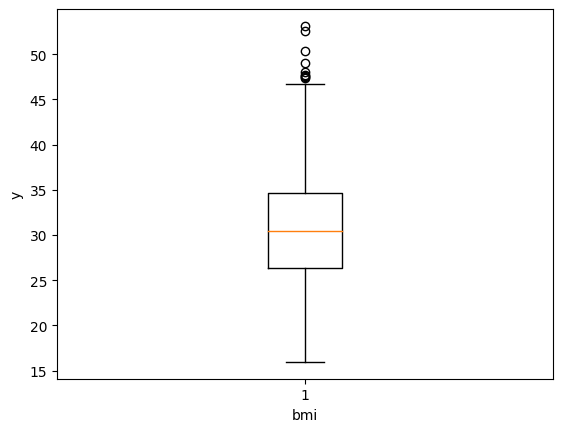

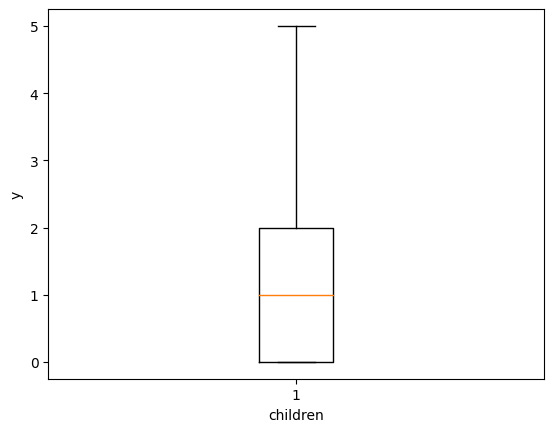

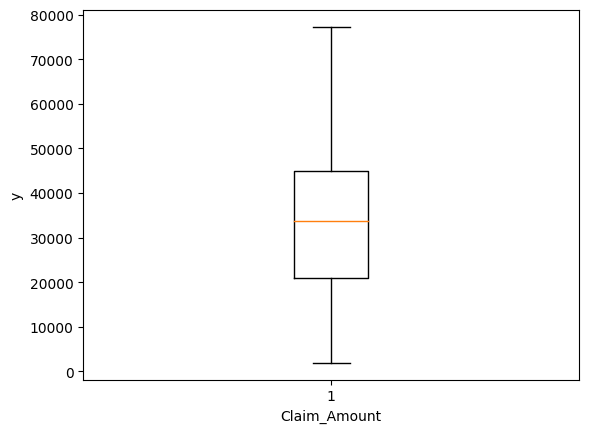

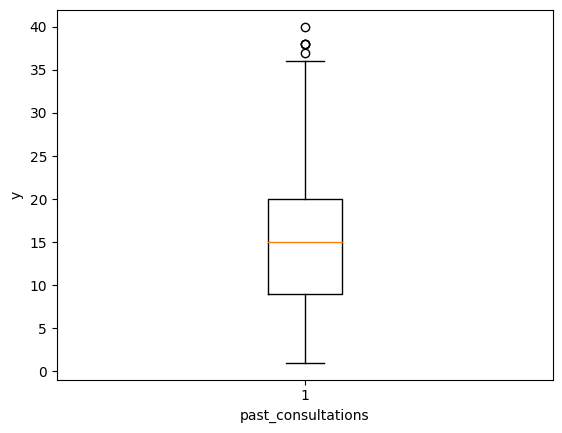

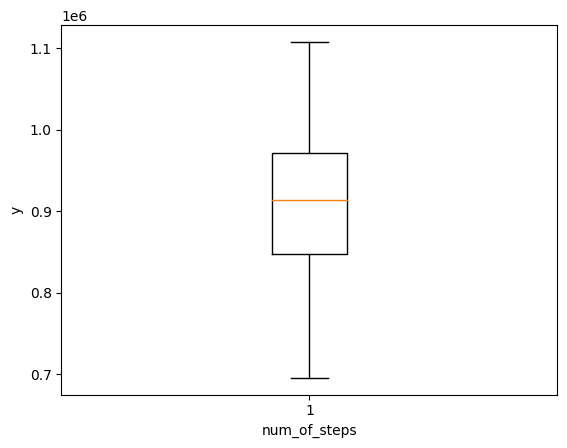

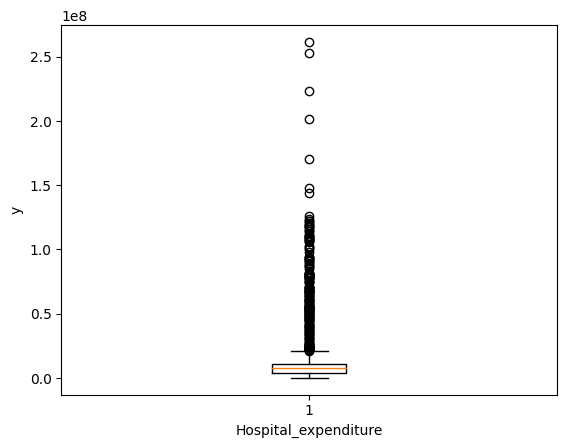

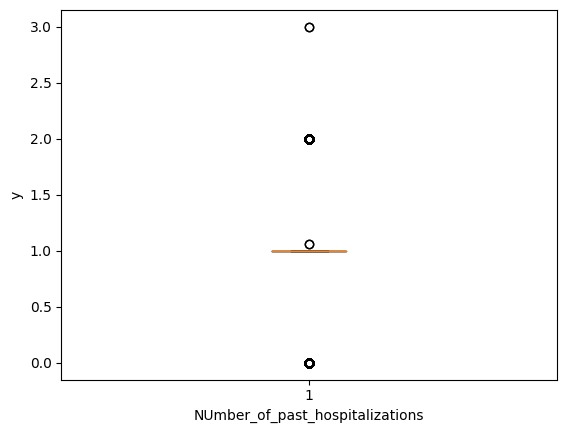

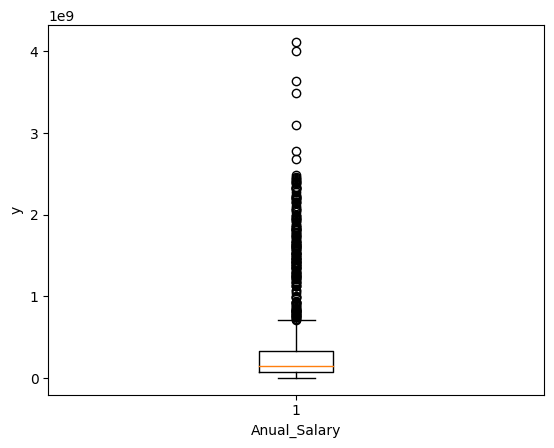

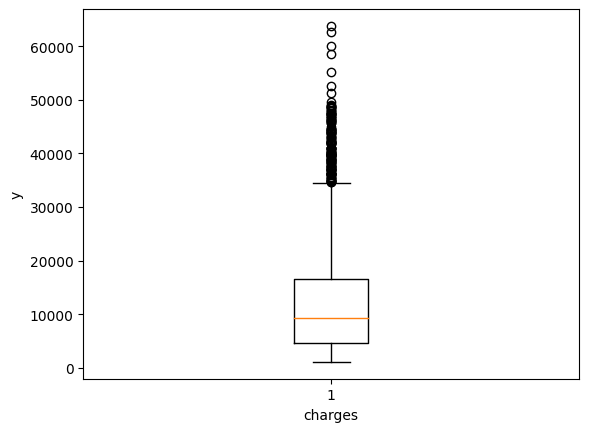

In [11]:
for col_name in c:
    if df[col_name].dtypes !="object" :
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("y")
        plt.show()

# how to remove outlier 

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [13]:
out_lier=["charges","Anual_Salary","past_consultations","Hospital_expenditure","bmi"]


In [14]:
for i in out_lier:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    df=df[(df[i]<=ul)&(df[i]>=ll)]

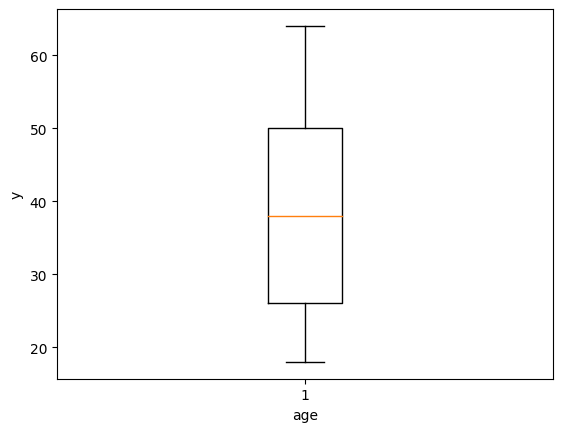

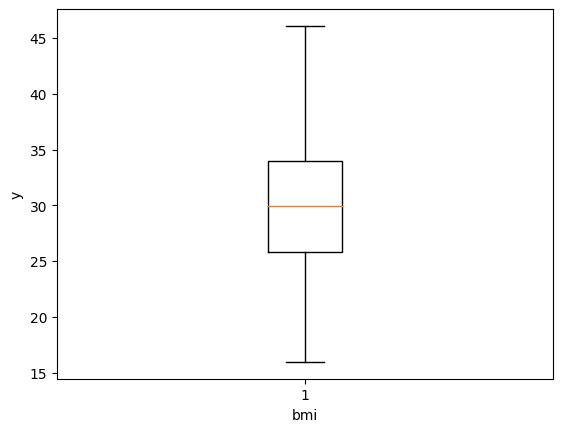

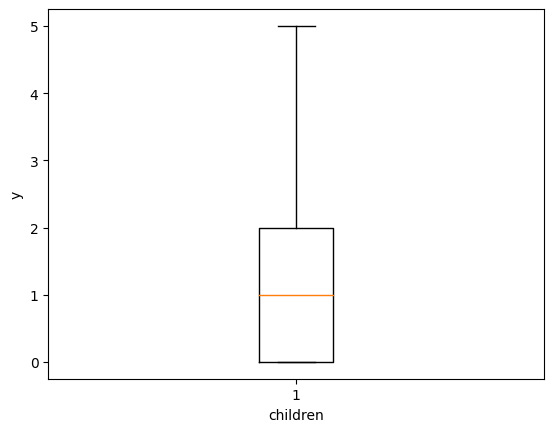

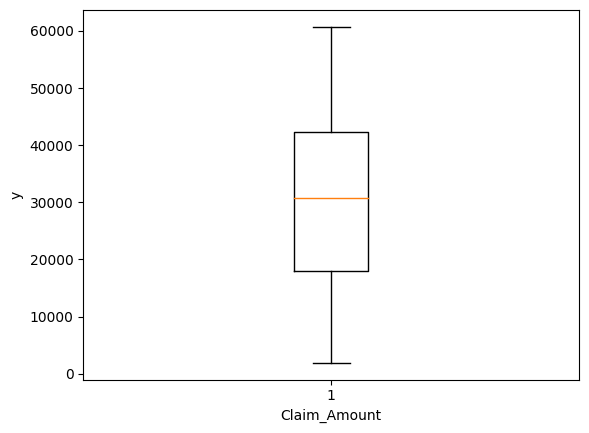

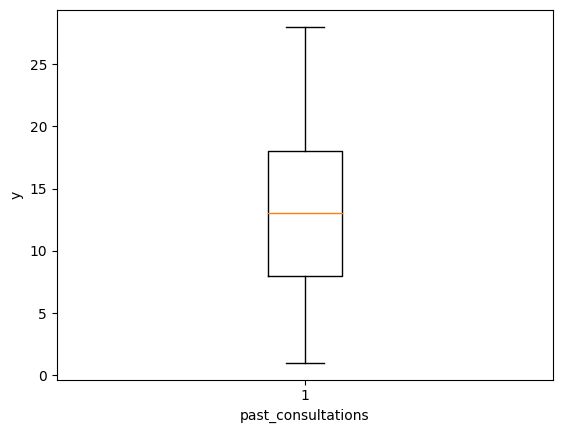

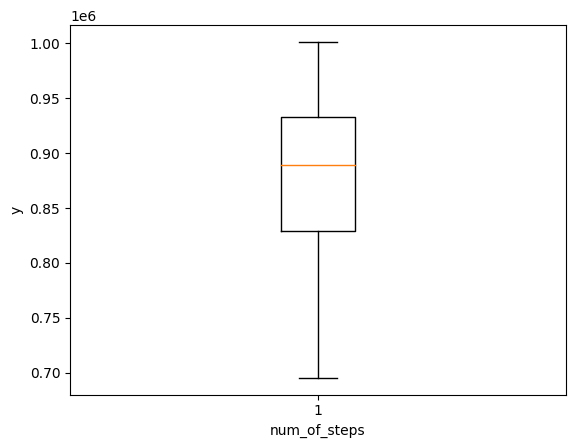

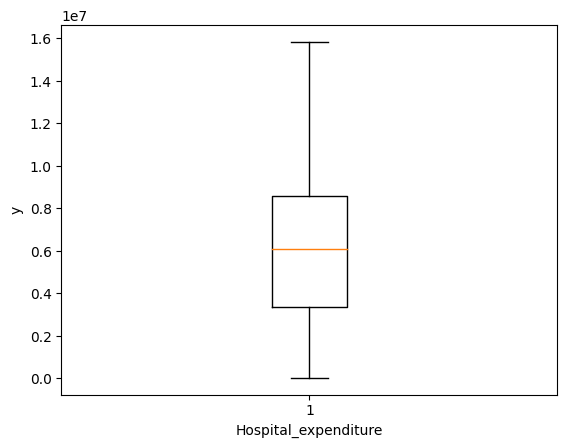

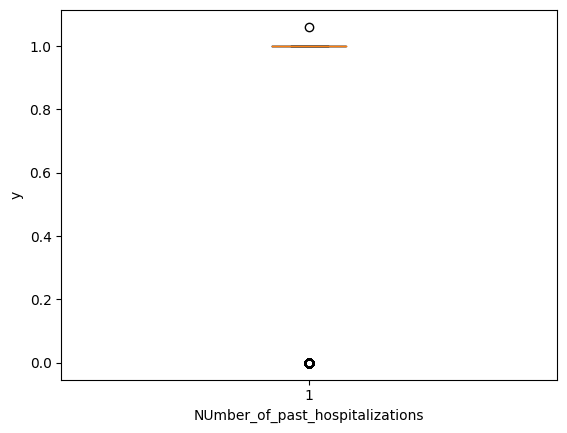

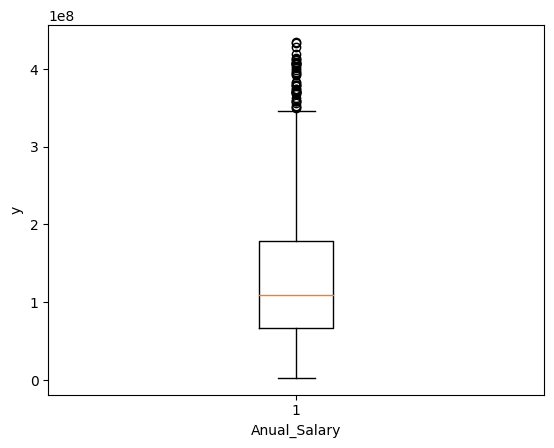

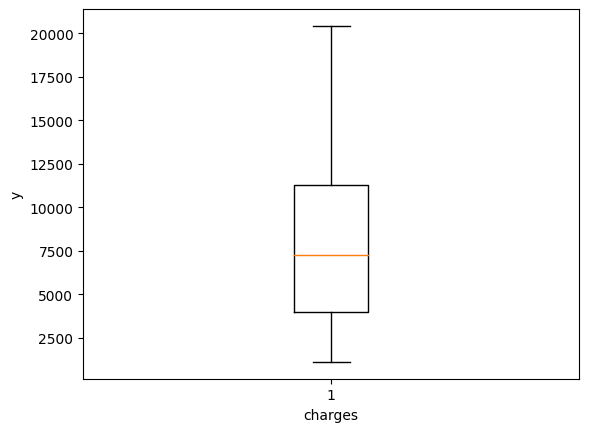

In [15]:
for col_name in c:
    if df[col_name].dtypes !="object" :
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel("y")
        plt.show()

In [16]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,32.0,male,28.930,1.0,yes,27709.20483,26.0,988726.0,1.572778e+07,1.0,4.067092e+08,southeast,19719.69470
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455
1066,39.0,male,26.410,0.0,yes,30912.36385,26.0,982355.0,1.113581e+07,1.0,4.276393e+08,northeast,20149.32290
1069,35.0,female,28.025,0.0,yes,17200.14586,15.0,993979.0,1.247744e+07,1.0,3.696849e+08,northwest,20234.85475


In [17]:
#  lebal encodind for object value to 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
for c in col:
    if df[c].dtypes=="object":
        df[c]=le.fit_transform(df[c])

In [19]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.210,0.0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,2,1121.87390
1,18.0,1,30.140,0.0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,2,1131.50660
2,18.0,1,33.330,0.0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,2,1135.94070
3,18.0,1,33.660,0.0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,2,1136.39940
4,18.0,1,34.100,0.0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,2,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,32.0,1,28.930,1.0,1,27709.20483,26.0,988726.0,1.572778e+07,1.0,4.067092e+08,2,19719.69470
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0,19798.05455
1066,39.0,1,26.410,0.0,1,30912.36385,26.0,982355.0,1.113581e+07,1.0,4.276393e+08,0,20149.32290
1069,35.0,0,28.025,0.0,1,17200.14586,15.0,993979.0,1.247744e+07,1.0,3.696849e+08,1,20234.85475


# variance inflation factotr (vif)

In [20]:
# feature sselectio technique
# to check colinearity

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
col_list=[]
for i in df.columns :
    if ((df[i].dtypes!= "object") & (i!="charges")):
        col_list.append(i)

In [23]:
x=df[col_list]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["vif_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [24]:
vif_data

,feature,vif_value
0,age,22.279722
1,sex,1.968982
2,bmi,29.923390
3,children,2.087879
4,smoker,2.574163
5,Claim_Amount,5.738272
6,past_consultations,6.371562
7,num_of_steps,69.912920
8,Hospital_expenditure,5.434126
9,NUmber_of_past_hospitalizations,12.758644


In [25]:
x.drop(["num_of_steps"],axis=1,inplace=True )

C:\Users\Vikas\AppData\Local\Temp\ipykernel_34952\1420868861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(["num_of_steps"],axis=1,inplace=True )


In [26]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.210,0.0,0,29087.54313,17.0,4.720921e+06,0.0,5.578497e+07,2
1,18.0,1,30.140,0.0,0,39053.67437,7.0,4.329832e+06,0.0,1.370089e+07,2
2,18.0,1,33.330,0.0,0,39023.62759,19.0,6.884861e+06,0.0,7.352311e+07,2
3,18.0,1,33.660,0.0,0,28185.39332,11.0,4.274774e+06,0.0,7.581968e+07,2
4,18.0,1,34.100,0.0,0,14697.85941,16.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...
1060,32.0,1,28.930,1.0,1,27709.20483,26.0,1.572778e+07,1.0,4.067092e+08,2
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,1.083030e+07,1.0,3.696849e+08,0
1066,39.0,1,26.410,0.0,1,30912.36385,26.0,1.113581e+07,1.0,4.276393e+08,0
1069,35.0,0,28.025,0.0,1,17200.14586,15.0,1.247744e+07,1.0,3.696849e+08,1


In [27]:

vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["vif_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [28]:
vif_data

,feature,vif_value
0,age,19.646281
1,sex,1.934441
2,bmi,14.373302
3,children,2.058411
4,smoker,2.409602
5,Claim_Amount,5.375062
6,past_consultations,6.061985
7,Hospital_expenditure,5.235206
8,NUmber_of_past_hospitalizations,11.576074
9,Anual_Salary,8.301499


In [29]:
x=x.drop(["age"],axis=1)

In [30]:
x

,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,1,23.210,0.0,0,29087.54313,17.0,4.720921e+06,0.0,5.578497e+07,2
1,1,30.140,0.0,0,39053.67437,7.0,4.329832e+06,0.0,1.370089e+07,2
2,1,33.330,0.0,0,39023.62759,19.0,6.884861e+06,0.0,7.352311e+07,2
3,1,33.660,0.0,0,28185.39332,11.0,4.274774e+06,0.0,7.581968e+07,2
4,1,34.100,0.0,0,14697.85941,16.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...
1060,1,28.930,1.0,1,27709.20483,26.0,1.572778e+07,1.0,4.067092e+08,2
1062,0,20.045,2.0,1,21596.43846,10.0,1.083030e+07,1.0,3.696849e+08,0
1066,1,26.410,0.0,1,30912.36385,26.0,1.113581e+07,1.0,4.276393e+08,0
1069,0,28.025,0.0,1,17200.14586,15.0,1.247744e+07,1.0,3.696849e+08,1


In [31]:

vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["vif_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [32]:
vif_data

,feature,vif_value
0,sex,1.911166
1,bmi,13.660726
2,children,1.983757
3,smoker,1.675122
4,Claim_Amount,5.285092
5,past_consultations,6.020237
6,Hospital_expenditure,5.222990
7,NUmber_of_past_hospitalizations,8.419207
8,Anual_Salary,5.983762
9,region,2.931767


In [33]:
x=x.drop(["bmi"],axis=1)

In [34]:
x

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,1,0.0,0,29087.54313,17.0,4.720921e+06,0.0,5.578497e+07,2
1,1,0.0,0,39053.67437,7.0,4.329832e+06,0.0,1.370089e+07,2
2,1,0.0,0,39023.62759,19.0,6.884861e+06,0.0,7.352311e+07,2
3,1,0.0,0,28185.39332,11.0,4.274774e+06,0.0,7.581968e+07,2
4,1,0.0,0,14697.85941,16.0,3.787294e+06,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...
1060,1,1.0,1,27709.20483,26.0,1.572778e+07,1.0,4.067092e+08,2
1062,0,2.0,1,21596.43846,10.0,1.083030e+07,1.0,3.696849e+08,0
1066,1,0.0,1,30912.36385,26.0,1.113581e+07,1.0,4.276393e+08,0
1069,0,0.0,1,17200.14586,15.0,1.247744e+07,1.0,3.696849e+08,1


In [35]:

vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["vif_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [36]:
vif_data

,feature,vif_value
0,sex,1.819135
1,children,1.982573
2,smoker,1.523631
3,Claim_Amount,4.715111
4,past_consultations,5.476691
5,Hospital_expenditure,4.874196
6,NUmber_of_past_hospitalizations,7.514375
7,Anual_Salary,5.958598
8,region,2.582108


In [37]:
x=x.drop(["NUmber_of_past_hospitalizations"],axis=1)

In [38]:

vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["vif_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [39]:
vif_data

,feature,vif_value
0,sex,1.817884
1,children,1.750837
2,smoker,1.461644
3,Claim_Amount,4.339350
4,past_consultations,5.186807
5,Hospital_expenditure,4.708814
6,Anual_Salary,5.342095
7,region,2.567325


In [40]:
x

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
0,1,0.0,0,29087.54313,17.0,4.720921e+06,5.578497e+07,2
1,1,0.0,0,39053.67437,7.0,4.329832e+06,1.370089e+07,2
2,1,0.0,0,39023.62759,19.0,6.884861e+06,7.352311e+07,2
3,1,0.0,0,28185.39332,11.0,4.274774e+06,7.581968e+07,2
4,1,0.0,0,14697.85941,16.0,3.787294e+06,2.301232e+07,2
...,...,...,...,...,...,...,...,...
1060,1,1.0,1,27709.20483,26.0,1.572778e+07,4.067092e+08,2
1062,0,2.0,1,21596.43846,10.0,1.083030e+07,3.696849e+08,0
1066,1,0.0,1,30912.36385,26.0,1.113581e+07,4.276393e+08,0
1069,0,0.0,1,17200.14586,15.0,1.247744e+07,3.696849e+08,1


# model buliding

In [41]:
# spliting the data into independent and dependent
# charges is dependence and x is indenpence

In [42]:
x

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region
0,1,0.0,0,29087.54313,17.0,4.720921e+06,5.578497e+07,2
1,1,0.0,0,39053.67437,7.0,4.329832e+06,1.370089e+07,2
2,1,0.0,0,39023.62759,19.0,6.884861e+06,7.352311e+07,2
3,1,0.0,0,28185.39332,11.0,4.274774e+06,7.581968e+07,2
4,1,0.0,0,14697.85941,16.0,3.787294e+06,2.301232e+07,2
...,...,...,...,...,...,...,...,...
1060,1,1.0,1,27709.20483,26.0,1.572778e+07,4.067092e+08,2
1062,0,2.0,1,21596.43846,10.0,1.083030e+07,3.696849e+08,0
1066,1,0.0,1,30912.36385,26.0,1.113581e+07,4.276393e+08,0
1069,0,0.0,1,17200.14586,15.0,1.247744e+07,3.696849e+08,1


In [43]:
y=df["charges"]
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1060    19719.69470
1062    19798.05455
1066    20149.32290
1069    20234.85475
1072    20420.60465
Name: charges, Length: 1044, dtype: float64

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
ln=LinearRegression()

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=3)

In [123]:
ln.fit(x_train,y_train)

LinearRegression()

In [124]:
from sklearn.metrics import *

In [125]:
model_pre=ln.predict(x_test)

In [126]:
# accurcy

In [127]:
mse=mean_squared_error(model_pre,y_test)
mse

3298867.8582322537

In [128]:
# rmse value should be less becuz it shows error
rmse=np.sqrt(mse)
rmse

1816.2785739616745

In [129]:
# r2_score value should be more becuz it shows accurecy
r2_score(model_pre,y_test)

0.7976788205789496

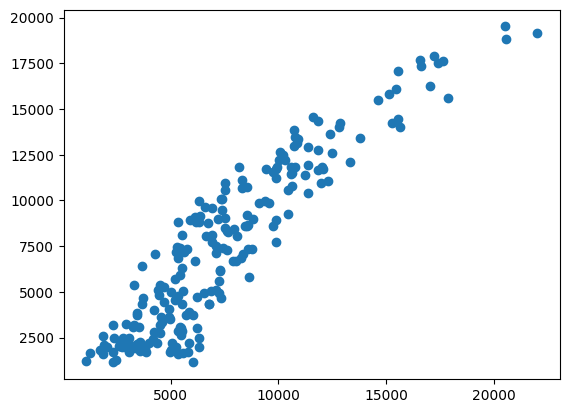

In [130]:
plt.scatter(model_pre,y_test)